In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder

In [22]:
# reads from CSV file
data = pd.read_csv('fastfood.csv')

In [23]:
# calculate mean values of nutrients and prints them
calories_mean = data['calories'].mean()
fat_mean = data['total_fat'].mean()
protein_mean = data['protein'].mean()
carbs_mean = data['total_carb'].mean()

In [38]:
# calculate the sum of nutrients
total_fat_sum = data['total_fat'].sum()
protein_sum = data['protein'].sum()
carbohydrates_sum = data['total_carb'].sum()
calories_sum = data['calories'].sum()

print("Mean Calories:", calories_mean)
print("Mean Fat:", fat_mean)
print("Mean Protein:", protein_mean)
print("Mean Carbohydrates:", carbs_mean)


Mean Calories: 530.9126213592233
Mean Fat: 26.59029126213592
Mean Protein: 27.891050583657588
Mean Carbohydrates: 45.664077669902916


In [39]:
# splits data into input features (X) and target variable (y)
X = data.drop(['calories'], axis=1)
y = data['calories']

In [27]:
# one-hot encoding for categorical variable 'restaurant'
categorical_columns = ['restaurant']
encoder = OneHotEncoder(sparse_output=False)
X_encoded = pd.DataFrame(encoder.fit_transform(X[categorical_columns]))
column_names = encoder.get_feature_names_out(categorical_columns)
X_encoded.columns = column_names


In [40]:
# splits the encoded data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [44]:
# create linear regression model and using the training data
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [45]:
# prediction the test data
predictions = model.predict(X_test)

In [46]:
# calculate mean sqarred error
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

Mean Squared Error: 90037.90291262136


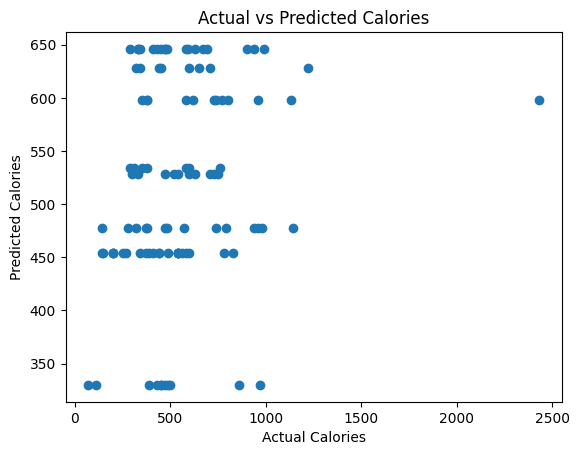

In [47]:
# plotting actual vs predicted calories
plt.scatter(y_test, predictions)
plt.xlabel('Actual Calories')
plt.ylabel('Predicted Calories')
plt.title('Actual vs Predicted Calories')
plt.show()

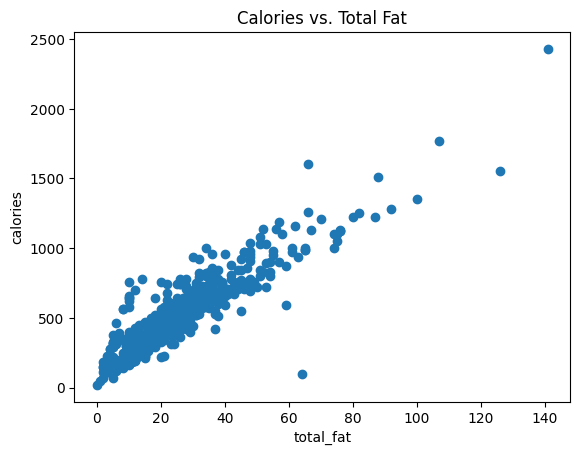

In [35]:
plt.scatter(data['total_fat'], data['calories'])
plt.xlabel('total_fat')
plt.ylabel('calories')
plt.title('Calories vs. Total Fat')
plt.show()

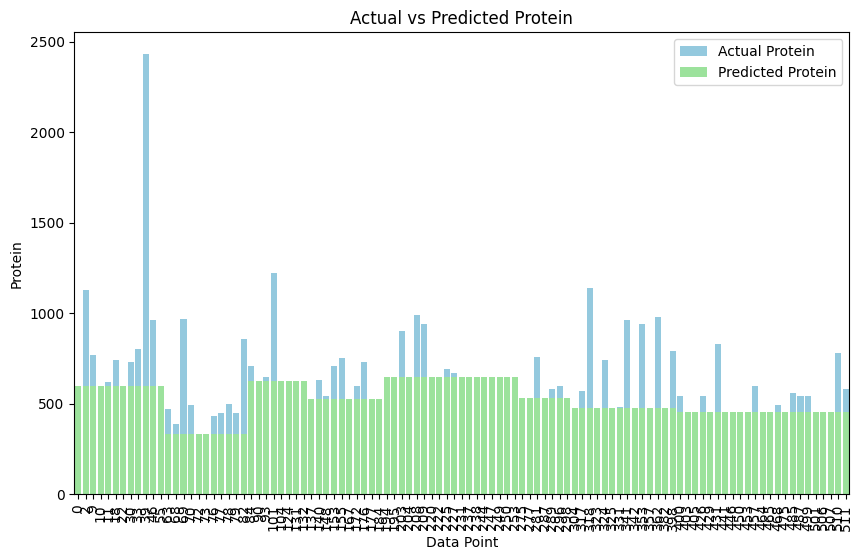

In [48]:
# plotting predicted actual vs predicted protein
plt.figure(figsize=(10, 6))
sns.barplot(x=y_test.index, y=y_test.values, color='skyblue', label='Actual Protein')
sns.barplot(x=y_test.index, y=predictions, color='lightgreen', label='Predicted Protein')
plt.xlabel('Data Point')
plt.ylabel('Protein')
plt.title('Actual vs Predicted Protein')
plt.legend()
plt.xticks(rotation=90)
plt.show()


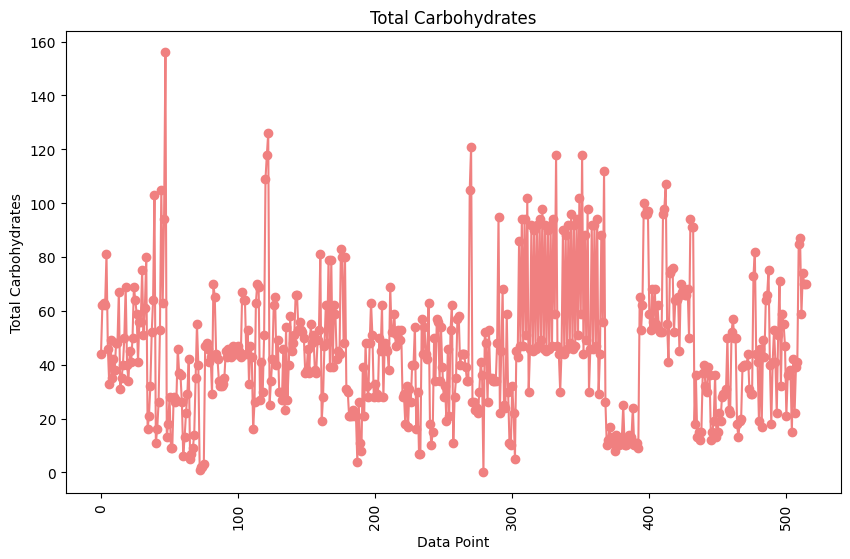

In [50]:
# plotting predicted actu vs actual carbohydrates
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['total_carb'], marker='o', linestyle='-', color='lightcoral')
plt.xlabel('Data Point')
plt.ylabel('Total Carbohydrates')
plt.title('Total Carbohydrates')
plt.xticks(rotation=90)
plt.show()

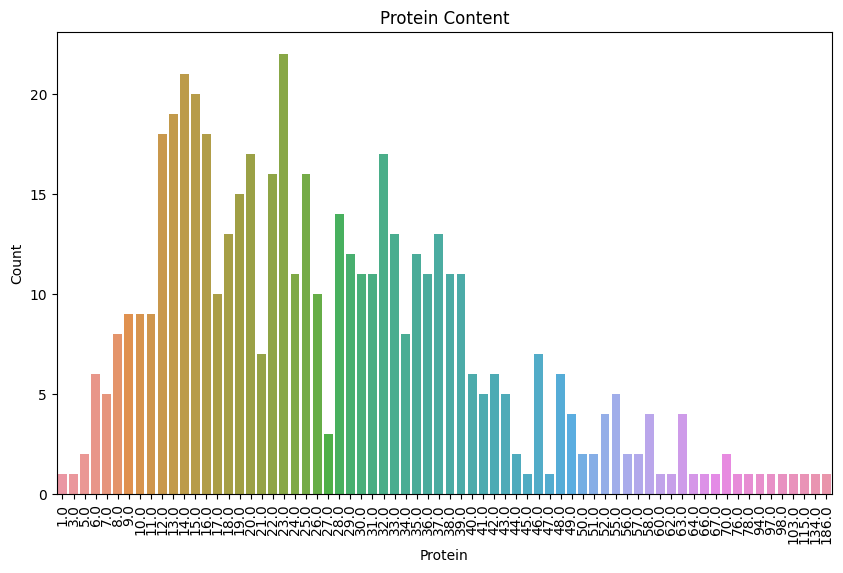

In [51]:
# protein content
protein_count = data['protein'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=protein_count.index, y=protein_count.values)
plt.xlabel('Protein')
plt.ylabel('Count')
plt.title('Protein Content')
plt.xticks(rotation=90)
plt.show()

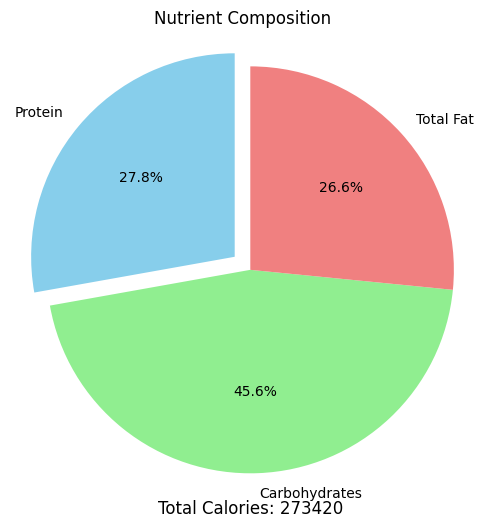

In [52]:
# pie chart
labels = ['Protein', 'Carbohydrates', 'Total Fat']
sizes = [protein_sum, carbohydrates_sum, total_fat_sum]
colors = ['skyblue', 'lightgreen', 'lightcoral']
explode = (0.1, 0, 0) 

plt.figure(figsize=(6, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Nutrient Composition')
plt.axis('equal')
plt.text(0, -1.2, f"Total Calories: {calories_sum}", fontsize=12, ha='center')
plt.show()